In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.cluster import KMeans
import numpy as np

In [2]:
#load data
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


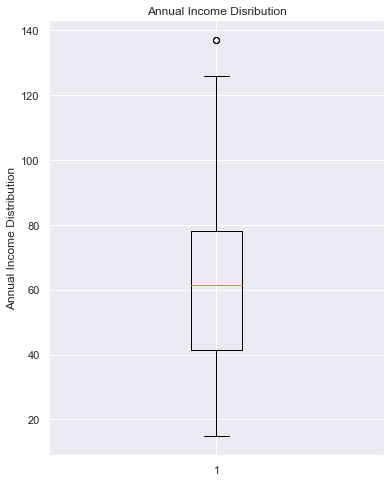

In [6]:
#Annual income and spending score visualization using boxplot
plt.figure(figsize=(6,8))
plt.boxplot(data['Annual Income (k$)'])
plt.ylabel('Annual Income Distribution')
plt.title('Annual Income Disribution')
plt.show()

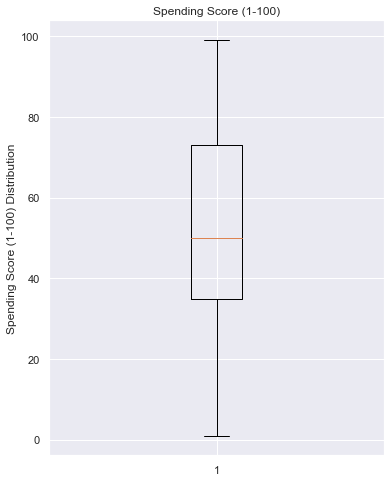

In [7]:
plt.figure(figsize=(6,8))
plt.boxplot(data['Spending Score (1-100)'])
plt.ylabel('Spending Score (1-100) Distribution')
plt.title('Spending Score (1-100)')
plt.show()

C:\Users\Windows 10\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


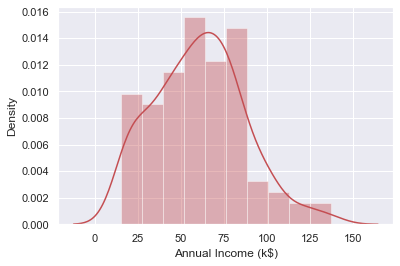

In [8]:
#Annual Income (k$) Distribution
sns.distplot(data['Annual Income (k$)'],color='r')
plt.show()


C:\Users\Windows 10\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


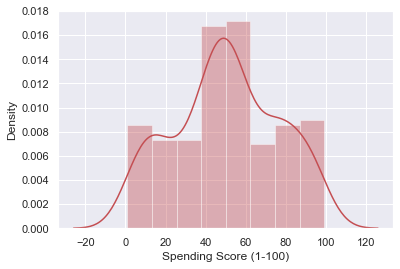

In [9]:
# Spending Score (1-100) Distribution
sns.distplot(data['Spending Score (1-100)'],color='r')
plt.show()

In [10]:
#Mall Customer by Gender (%)
gender= data.groupby('Gender')['Gender'].count()
gender

Gender
Female    112
Male       88
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x1af1a1be9d0>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.21548852023467338, -1.1296303367239529, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.0%'),
  Text(0.12179785926307625, -0.6384867120613645, '44.0%')])

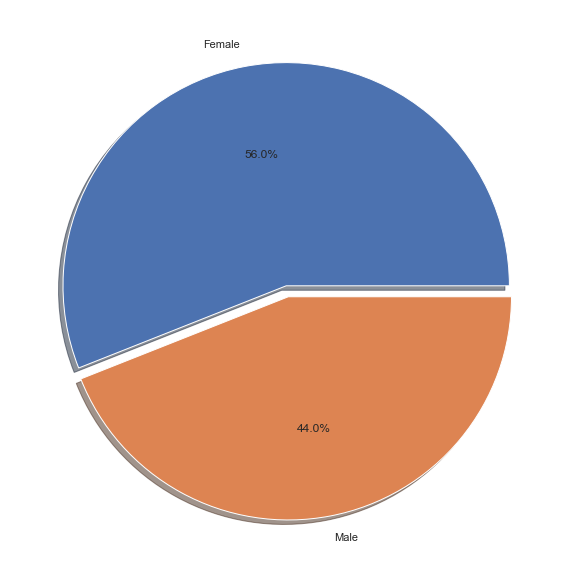

In [11]:
plt.figure(figsize=(10,12))
plt.pie(gender.values,autopct='%0.1f%%', labels=gender.keys(), shadow=True,explode=[0,0.05])

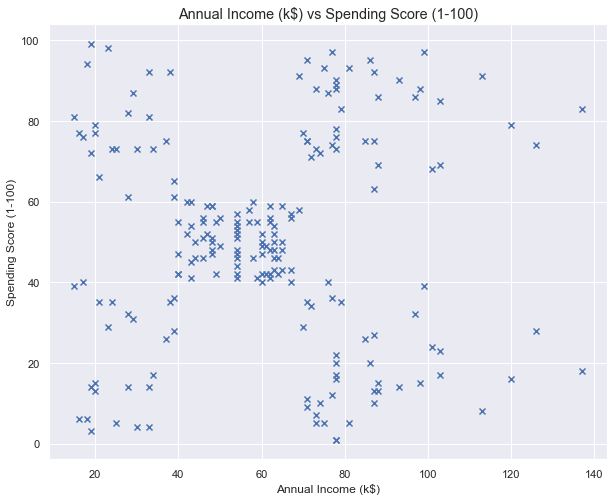

In [12]:
#visualize annual income vs spending score
plt.figure(figsize=(10,8))
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],marker='x')
plt.style.use('ggplot')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [13]:
X = data.iloc[:, [3, 4]].values

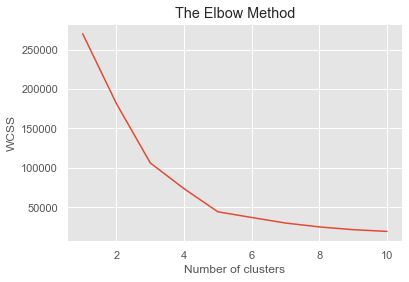

In [14]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

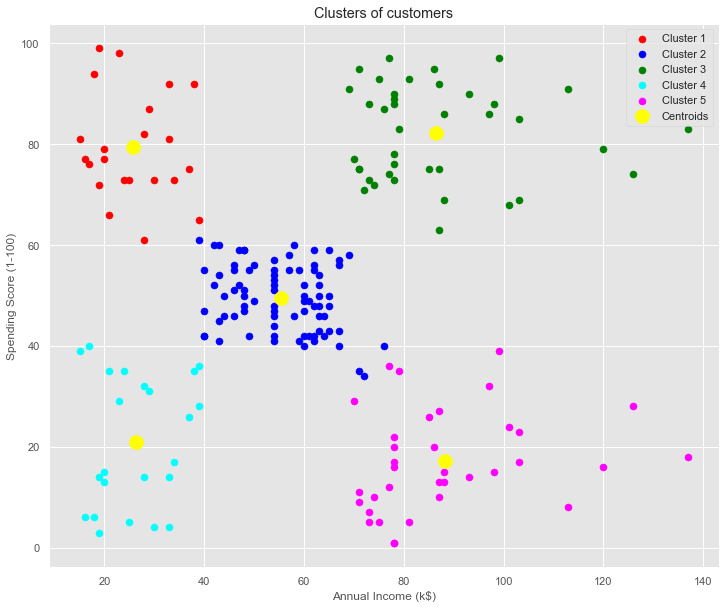

In [16]:
# Visualising the clusters
plt.figure(figsize=(12,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [17]:
#predict new data 
new_data =np.array([[20,40],[100,90],[90,10],[20,90],[50,60]])
new_data

array([[ 20,  40],
       [100,  90],
       [ 90,  10],
       [ 20,  90],
       [ 50,  60]])

In [18]:
predictions=kmeans.predict(new_data)
predictions

array([3, 2, 4, 0, 1])

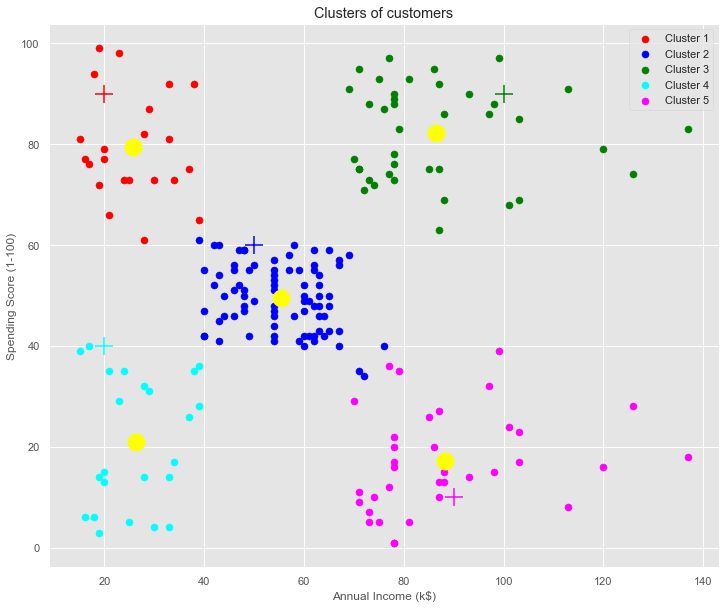

In [19]:
# Visualising the clusters
plt.figure(figsize=(12,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(new_data[predictions == 0, 0], new_data[predictions == 0, 1], s = 300, marker='+', c = 'red')
plt.scatter(new_data[predictions == 1, 0], new_data[predictions == 1, 1], s = 300, marker='+', c = 'blue')
plt.scatter(new_data[predictions == 2, 0], new_data[predictions == 2, 1], s = 300, marker='+', c = 'green')
plt.scatter(new_data[predictions == 3, 0], new_data[predictions == 3, 1], s = 300, marker='+', c = 'cyan')
plt.scatter(new_data[predictions == 4, 0], new_data[predictions == 4, 1], s = 300, marker='+', c = 'magenta')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,c = 'yellow')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()